# Check Environment

In [1]:
import torch, torchvision
print('Pytorch 版本', torch.__version__)
print('CUDA 是否可用',torch.cuda.is_available())

Pytorch 版本 2.0.1+cu117
CUDA 是否可用 True


In [2]:
import mmcv
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print('MMCV版本', mmcv.__version__)
print('CUDA版本', get_compiling_cuda_version())
print('编译器版本', get_compiler_version())

MMCV版本 2.0.0
CUDA版本 11.7
编译器版本 GCC 9.3


In [3]:
import mmagic
print('MMagic版本', mmagic.__version__)

MMagic版本 1.0.2dev0


# Install 3rd party dependences

In [1]:
!pip install opencv-python pillow matplotlib seaborn tqdm

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [2]:
!pip install clip transformers gradio 'httpx[socks]' diffusers==0.14.0 -i https://pypi.tuna.tsinghua.edu.cn/simple

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [6]:
!mim install 'mmdet>=3.0.0'

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Looking in links: https://download.openmmlab.com/mmcv/dist/cu117/torch2.0.0/index.html


# Run MMagic

In [1]:
import os
os.chdir('../mmagic')
os.getcwd()

'/home/elsa/Workspace/OpenMMLab/mmagic'

In [20]:
import cv2
import numpy as np
import mmcv
from mmengine import Config
from PIL import Image
from matplotlib.pyplot import imshow

from mmagic.registry import MODELS
from mmagic.utils import register_all_modules

register_all_modules()
%matplotlib inline

In [9]:
cfg = Config.fromfile('configs/controlnet/controlnet-canny.py')
controlnet = MODELS.build(cfg.model).cuda()

06/19 00:34:24 - mmengine - INFO - Set model dtype to 'torch.float32'.
06/19 00:34:31 - mmengine - INFO - Creating runwayml/stable-diffusion-v1-5 by 'HuggingFace'
Do not support Xformers. Please install Xformers first. The program will run without Xformers.
06/19 00:34:31 - mmengine - INFO - Set model dtype to 'torch.float32'.
Do not support Xformers. Please install Xformers first. The program will run without Xformers.


In [8]:
control_url = '../hw5/test.jpg'
control_img = mmcv.imread(control_url)
control = cv2.Canny(control_img, 100, 200)
control = control[:, :, None]
control = np.concatenate([control] * 3, axis=2)
control = Image.fromarray(control)

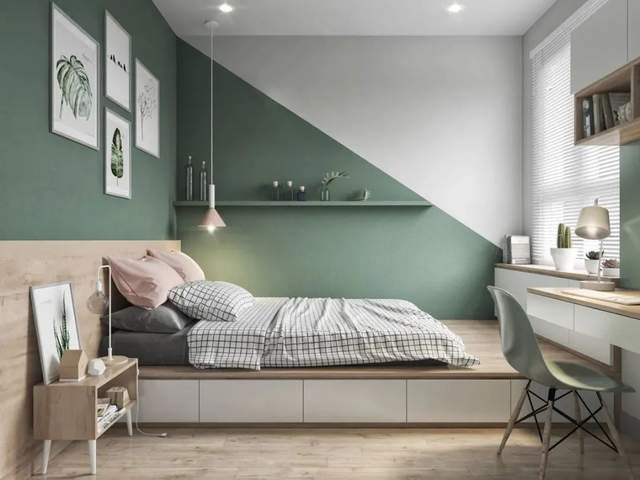

In [11]:
Image.open(control_url)

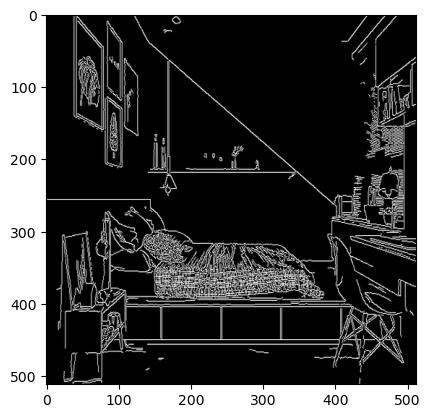

In [21]:
imshow(control)

In [12]:
prompt = 'Room with a forest walls and a sky ceilling with stars.'

In [13]:
output_dict = controlnet.infer(prompt, control=control)
samples = output_dict['samples']
for idx, sample in enumerate(samples):
    sample.save(f'sample_{idx}.png')
controls = output_dict['controls']
for idx, control in enumerate(controls):
    control.save(f'control_{idx}.png')

100%|███████████████████████████████████████████| 20/20 [00:21<00:00,  1.05s/it]


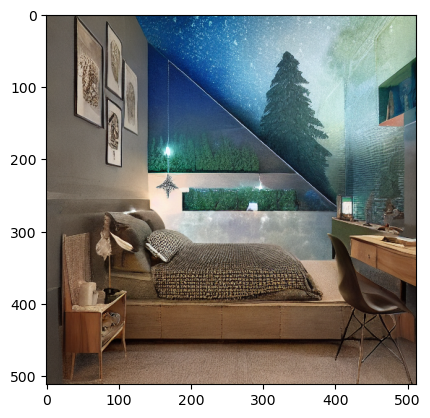

In [25]:
imshow(samples[0])